<a href="https://colab.research.google.com/github/dunliangyang2010/AutoKeras/blob/main/Structured_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [2]:
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [3]:
train_file_url = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'
test_file_url = 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'
train = pd.read_csv(train_file_url)
test = pd.read_csv(test_file_url)

In [4]:
test

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [7]:
# x_train/x_test --> DataFrame object
# y_train/y_test --> Series object (a column of DataFrame)
x_train = train.drop(['survived'], axis=1)
y_train = train['survived']

x_test = test.drop(['survived'], axis=1)
y_test = test['survived']

# Model

In [8]:
clf = ak.StructuredDataClassifier(max_trials=5)
clf.fit(x_train, y_train)

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.8608695864677429

Best val_accuracy So Far: 0.895652174949646
Total elapsed time: 00h 00m 39s
INFO:tensorflow:Oracle triggered exit
20/20 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.7432
INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


In [ ]:
# StructuredDataClassifier 可吃多種類input(ndarray, pandas Series, DataFrame, Tensorflow Dataset, CSV path file, url)
# ex clf.fit(train_file_url, 'survived') # 訓練資料集路徑/目標欄位名稱
# StructuredDataClassifier預設以val accuracy為目標優化,非val loss

# Evaluate

In [9]:
clf.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7500


[0.5445427298545837, 0.75]

In [10]:
predicted = clf.predict(x_test).flatten()

# convert panda series into ndarray
real = y_test.to_numpy().flatten()

# predicted[0]=0.0
for i in range(10):
  print(f'Passenger: #{i+1}')
  print('Predicted:', 'survived' if predicted[i] else 'not survived')
  print('Real:', 'survived' if real[i] else 'not survived')
  print('')

9/9 [==============================] - 0s 2ms/step
Passenger: #1
Predicted: not survived
Real: not survived

Passenger: #2
Predicted: not survived
Real: not survived

Passenger: #3
Predicted: not survived
Real: survived

Passenger: #4
Predicted: not survived
Real: survived

Passenger: #5
Predicted: not survived
Real: survived

Passenger: #6
Predicted: survived
Real: survived

Passenger: #7
Predicted: not survived
Real: not survived

Passenger: #8
Predicted: not survived
Real: not survived

Passenger: #9
Predicted: not survived
Real: not survived

Passenger: #10
Predicted: survived
Real: survived



# Visualization

In [13]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 9)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112  

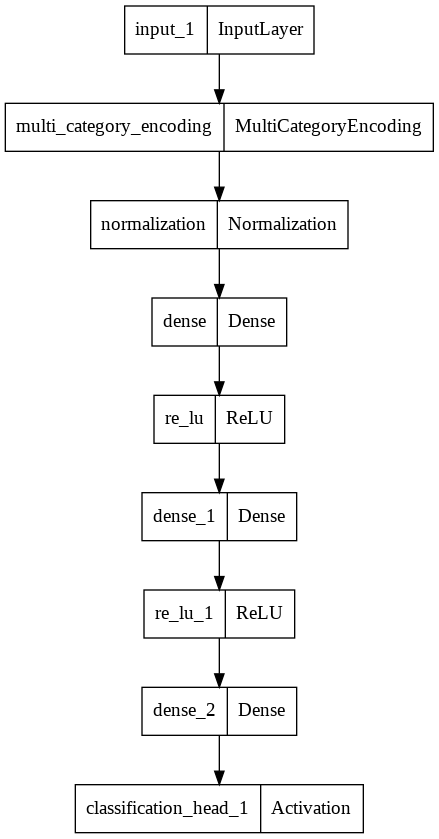

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model)